
# Project: Investigate a Dataset (TMDB 5000 Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset I have chosen is TMDB 5000 Movie Dataset
This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

> **Questions that data could answer**
    * What is the top 10 popular movies?
    * What Kinds of properties are associated with movies that have high revenues?
    * Which genres are most popluar from 1900 to 2000?
    * How the budget and revenue change over time?
    * What is the average runtime of the movies?
    * What is the average budget of the movies?

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> here we could explore the dataset, identify what issues we would fix for analysis, and delete unused data.



In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


#### Explore the dataset

In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
movie_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
movie_df.shape

(10866, 21)

In [7]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
sum(movie_df.duplicated())

1

In [9]:
movie_df.genres.head(1)

0    Action|Adventure|Science Fiction|Thriller
Name: genres, dtype: object

### Issues

* one duplicated row
* budget, revenue and run time have unaccurate data
* release date has a wrong data type
* missing values in many columns

### Data Cleaning 

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# get a copy from the data before making any cleaning
df = movie_df.copy()

#### Remove duplicated row

In [11]:
# remove the only duplicated row
df.drop_duplicates(inplace=True)

# check if it removed
sum(df.duplicated())

0

#### Drop unused columns

In [12]:
# list of unused columns ... 
cols = ['imdb_id','homepage', 'tagline', 'production_companies', 'keywords', 'overview','budget_adj', 'revenue_adj']

# drop it 
df.drop(cols, axis=1, inplace=True)

# See the change of the data
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


#### Change ralease date datatype 


In [13]:
# change the datatype to datetime format
df.release_date = pd.to_datetime(df.release_date)

# test 
df.release_date.dtype

dtype('<M8[ns]')

#### Drop missing values

In [14]:
# drop the missing values in all data 
df.dropna(inplace=True)

# test the result 
df.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

#### Replace Zeros in budget and revenue with np.nan

In [15]:
# replace zeros with np.nan then remove nan values

df[['budget', 'revenue']] = df[['budget', 'revenue']].replace(0, np.NAN) 

df.dropna(inplace=True)
# df.budget.value_counts()

In [16]:
df.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [17]:
# check the new shape 
df.shape

(3849, 13)

In [18]:
df.runtime[df.runtime == 0]

Series([], Name: runtime, dtype: int64)

**No more zeros in runtime column**

In [19]:
# save the new data 
df.to_csv('movie_dataset.csv')

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What are the top 10 popular movies?)

In [20]:
top = df[['popularity', 'original_title']].sort_values(by='popularity', ascending=False)[:10]

In [21]:
top.head()

,popularity,original_title
0,32.985763,Jurassic World
1,28.419936,Mad Max: Fury Road
629,24.949134,Interstellar
630,14.311205,Guardians of the Galaxy
2,13.112507,Insurgent


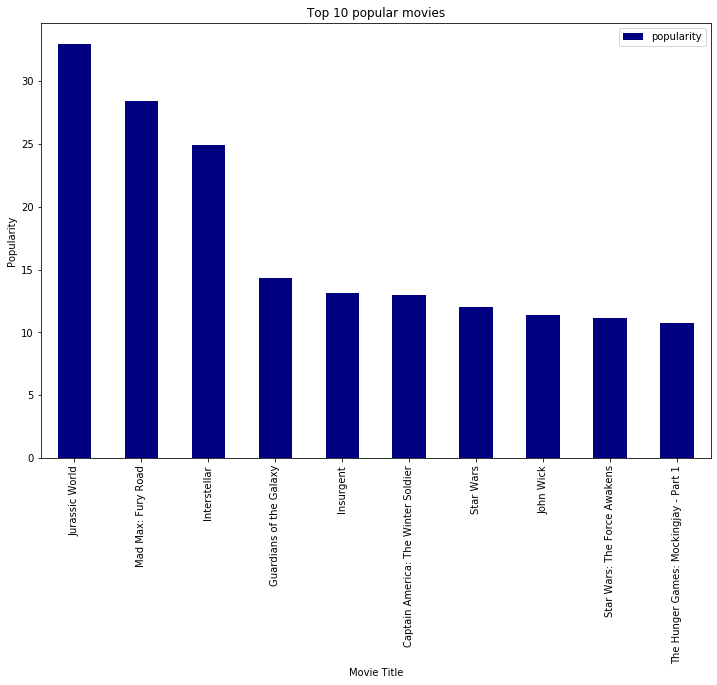

In [22]:
ax = top.plot(x='original_title', y='popularity', kind='bar', figsize=(12,8), color='navy');
ax.set_xlabel('Movie Title')
ax.set_ylabel('Popularity')
ax.set_title('Top 10 popular movies');


**The most popular movie is Jurassic World and it was surprising that star wars come in 7th place**

### Research Question 2 ( What Kinds of properties are associated with movies that have high revenues?!)

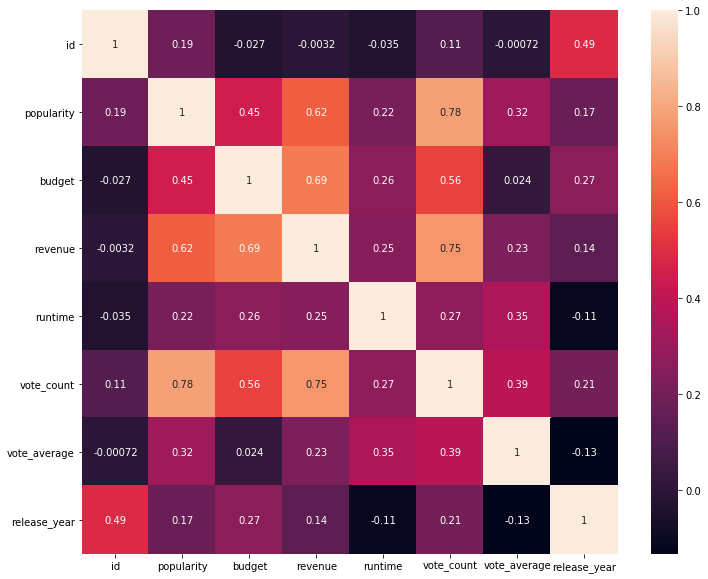

In [24]:
# plt.subplots(figsize=(10,10))
fig, ax = plt.subplots(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True, ax=ax);

**The proparities are vote count, budget and popularity**

In [45]:
def plt_scatter(x,y):
    return df.plot(x=x, y=y ,kind='scatter', figsize=(12,8), color='navy');

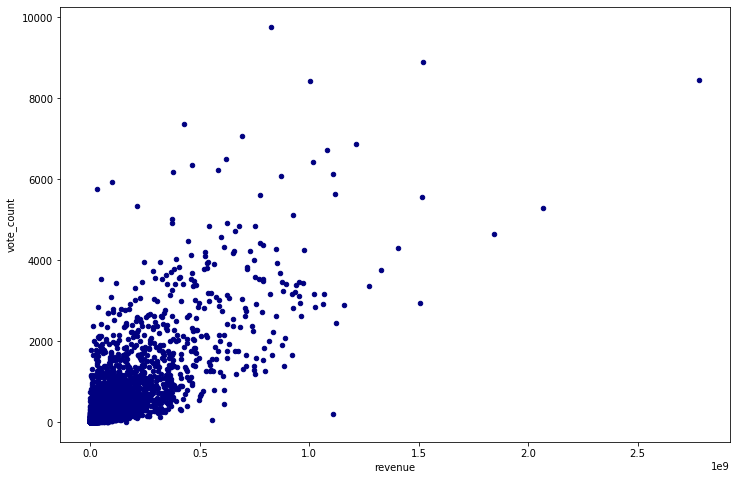

In [46]:
# Relation between revenue and vote count
plt_scatter('revenue', 'vote_count');

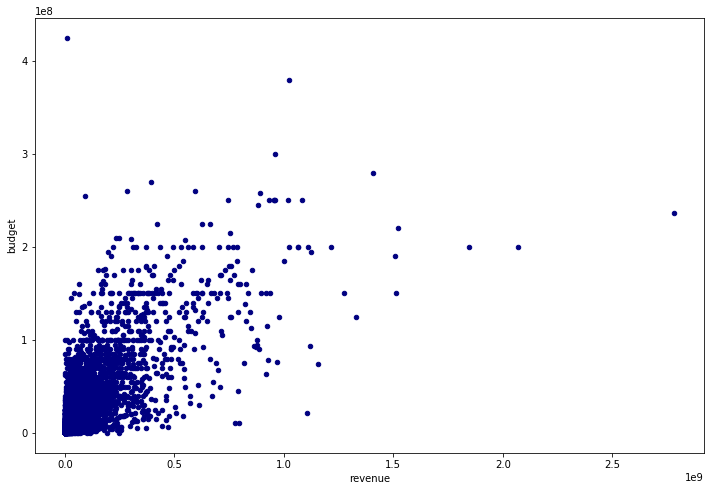

In [47]:
# Relation between revenue and budget
plt_scatter('revenue', 'budget');

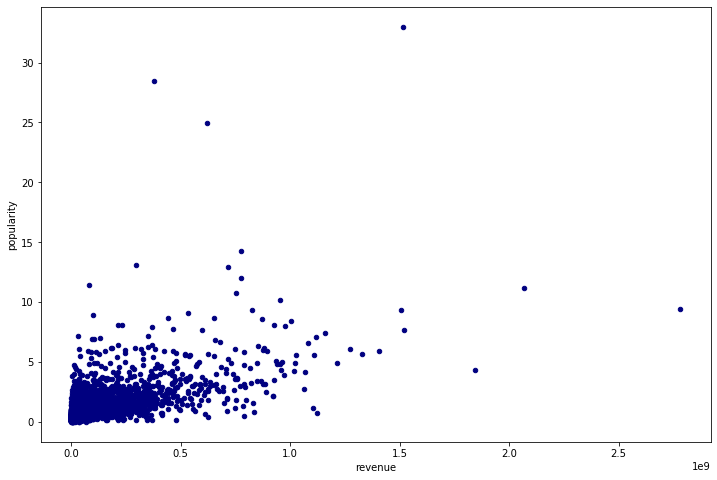

In [48]:
# Relation between revenue and popularity
plt_scatter('revenue', 'popularity');

### Research Question 3 (Which genres are most popluar from 1900 to 2000?)

In [49]:
genres = df[(df.release_year >= 1900)&(df.release_year<=2000)].genres

In [50]:
genres.head()

1329      Adventure|Action|Science Fiction
1330             Adventure|Action|Thriller
1331    Fantasy|Family|Animation|Adventure
1332                  Comedy|Drama|Romance
1334                 Science Fiction|Drama
Name: genres, dtype: object

In [30]:
genre = genres.str.cat(sep='|')
genre = pd.Series(genre.split('|'))

In [31]:
genre.value_counts()

Drama              652
Comedy             512
Thriller           469
Action             433
Adventure          302
Crime              269
Romance            249
Science Fiction    238
Horror             208
Fantasy            159
Family             149
Mystery            138
Music               56
History             54
Animation           53
War                 52
Western             28
Foreign              5
Documentary          4
TV Movie             1
dtype: int64

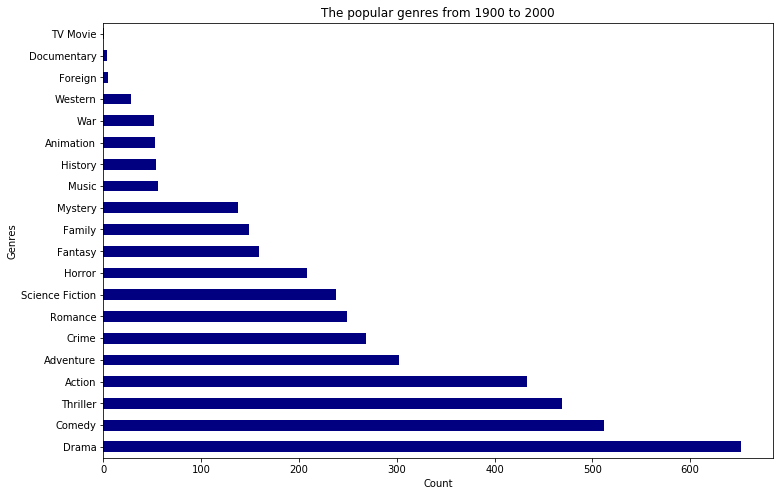

In [32]:
ax = genre.value_counts().plot(kind='barh', figsize=(12,8), color='navy');
ax.set_xlabel('Count')
ax.set_ylabel('Genres')
ax.set_title('The popular genres from 1900 to 2000');

**The most popular genre from 1900 to 2000 is Drama**

### Research Question 4 (How the budget and revenue change over time?)

In [33]:
budget = df.groupby('release_year').budget.sum()
revenue = df.groupby('release_year').revenue.sum()

In [34]:
budget.head(1)

release_year
1960    20806948.0
Name: budget, dtype: float64

In [35]:
revenue.head(1)

release_year
1960    129005000.0
Name: revenue, dtype: float64

In [36]:
# budget.plot(kind='line', figsize=(12,8), color='navy');

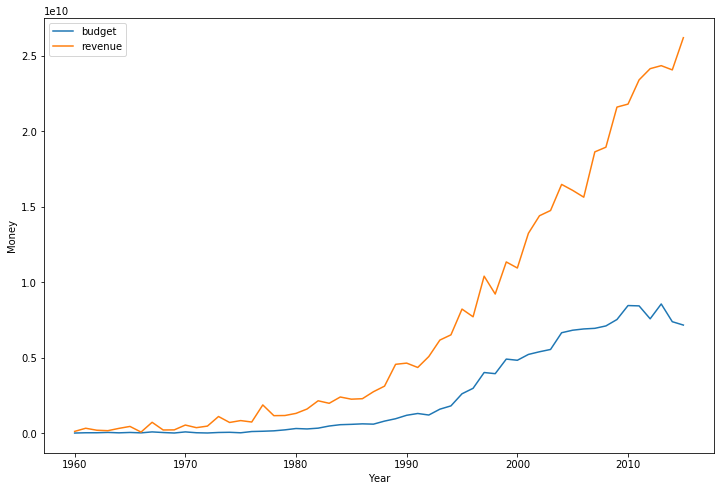

In [37]:
fig, ax = plt.subplots()
l = ['budget', 'revenue']
for i in l:
    var = df.groupby('release_year')[i].sum()
    ax = var.plot(kind='line', figsize=(12,8));

ax.set_xlabel("Year")
ax.set_ylabel("Money")
ax.legend(loc='best');

**There is a huge change in revenue over time**

 after 1990 we can see the big difference 

In [39]:
def col_mean(col):
    return df[col].mean()

### Research Question 5(What is the average runtime of the movies?)

In [40]:
avg_runtime =col_mean('runtime')
avg_runtime

109.21745908028059

The average runtime of the movies is 109 minutes.

### Research Question 6(What is the average budget of the movies?)

In [41]:
avg_budget = col_mean('budget')
avg_budget

37248859.98025461

The average budget of the movies is 37 million.

In [42]:
d = df[['revenue', 'director']].sort_values(by='revenue',ascending=False)[:10]

In [43]:
d.head(10)

,revenue,director
1386,2.781506e+09,James Cameron
3,2.068178e+09,J.J. Abrams
5231,1.845034e+09,James Cameron
4361,1.519558e+09,Joss Whedon
0,1.513529e+09,Colin Trevorrow
4,1.506249e+09,James Wan
14,1.405036e+09,Joss Whedon
3374,1.327818e+09,David Yates
5422,1.274219e+09,Chris Buck|Jennifer Lee
5425,1.215440e+09,Shane Black


In [44]:
d.director.value_counts()

Joss Whedon                2
James Cameron              2
Shane Black                1
Colin Trevorrow            1
J.J. Abrams                1
David Yates                1
James Wan                  1
Chris Buck|Jennifer Lee    1
Name: director, dtype: int64

<a id='conclusions'></a>
## Conclusions

At first, we analyzed the dataset to get the top 10 movies based on the popularity then we try to find what's properties are associated with movies that have high revenues and discovered that budget, vote count, and popularity have a high positive correlation with the revenue.


Then we analyzed genres to get the most popular one, and calculated the mean for runtime and budget.



### Limitation

We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.

Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed